In [2]:
!nvidia-smi

Sat Aug 16 20:55:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 42.7/235.7 GB disk)


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
dataset_path = "/content/drive/MyDrive/military_dataset"

for split in ["train", "val", "test"]:
  images_path = os.path.join(dataset_path, split, "images")
  labels_path = os.path.join(dataset_path, split, "labels")
  print(f"{split.upper()} -> Images: {len(os.listdir(images_path))}, Labels: {len(os.listdir(labels_path))}")

TRAIN -> Images: 21978, Labels: 21978
VAL -> Images: 2941, Labels: 2941
TEST -> Images: 1396, Labels: 1396


In [4]:
yaml_path = os.path.join(dataset_path, "military_dataset.yaml")
with open(yaml_path, "r") as f:
  print(f.read())

path: /kaggle/input/military-assets-dataset-12-classes-yolo8-format/military_object_dataset
test: test/images
train: train/images
val: val/images

names:
  0: camouflage_soldier
  1: weapon
  2: military_tank
  3: military_truck
  4: military_vehicle
  5: civilian
  6: soldier
  7: civilian_vehicle
  8: military_artillery
  9: trench
  10: military_aircraft
  11: military_warship



In [5]:
!pip install ultralytics --upgrade
!pip install --upgrade wandb


In [7]:
from ultralytics import YOLO

model = YOLO("yolov8x.pt")

model.train(
    data="/content/drive/MyDrive/military_dataset/military_dataset.yaml",
    epochs = 100,
    batch = 32,
    imgsz = 640,
    augment = True,
    mosaic = 1.0,
    mixup= 0.0,
    hsv_h = 0.015,
    hsv_s = 0.7,
    hsv_v = 0.4,
    flipud = 0.5,
    fliplr = 0.5,
    optimizer ="Adam",
    lr0 = 0.01,
    patience = 10,
    freeze= [0],
    name = "military_yolo_x",
    project = "military_yolo",
    device = 0,
    verbose = True
)

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/military_dataset/military_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=[0], half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=military_yolo_x2, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=10

train: Scanning /content/drive/MyDrive/military_dataset/train/labels.cache... 21978 images, 294 backgrounds, 0 corrupt: 100%|██████████| 21978/21978 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 43336. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 55.7±46.1 MB/s, size: 113.2 KB)


val: Scanning /content/drive/MyDrive/military_dataset/val/labels.cache... 2941 images, 273 backgrounds, 0 corrupt: 100%|██████████| 2941/2941 [00:00<?, ?it/s]


Plotting labels to military_yolo/military_yolo_x2/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to military_yolo/military_yolo_x2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        39G      1.844      2.773      1.943        136        640: 100%|██████████| 687/687 [06:38<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.40it/s]


                   all       2941       5081        0.6     0.0375     0.0347     0.0167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      23.4G      1.749      2.539      1.877        104        640: 100%|██████████| 687/687 [04:27<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.73it/s]


                   all       2941       5081      0.469      0.133     0.0864      0.041

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      23.6G      1.681       2.39      1.817        102        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.76it/s]


                   all       2941       5081      0.484      0.174      0.101      0.047

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      23.3G      1.648       2.32       1.79         97        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]


                   all       2941       5081      0.469      0.144      0.116     0.0577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      23.6G       1.61      2.226      1.756         81        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.76it/s]


                   all       2941       5081      0.587      0.132      0.128     0.0654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      23.3G      1.574       2.16      1.723        102        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.83it/s]

                   all       2941       5081      0.419      0.171      0.131     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      23.6G      1.554      2.087      1.705         95        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]


                   all       2941       5081      0.444      0.175      0.139     0.0708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      23.3G      1.535      2.035      1.697         72        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.72it/s]


                   all       2941       5081      0.541      0.197      0.173     0.0898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      23.6G      1.516      1.998      1.677        127        640: 100%|██████████| 687/687 [04:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.74it/s]


                   all       2941       5081       0.31      0.205      0.165     0.0842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      23.3G      1.496      1.943      1.663        116        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.76it/s]


                   all       2941       5081      0.502      0.209      0.193      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      23.5G       1.48      1.901      1.648         91        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]


                   all       2941       5081      0.391      0.196      0.168     0.0919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      23.3G      1.482      1.891       1.65        108        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]


                   all       2941       5081      0.366      0.242      0.227      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      23.6G       1.47      1.852      1.638         87        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]


                   all       2941       5081      0.257      0.287      0.239      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      23.3G      1.462      1.839      1.632        101        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]


                   all       2941       5081      0.438      0.256      0.246       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      23.6G      1.449      1.816      1.624        103        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.77it/s]


                   all       2941       5081      0.474      0.248      0.251      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      23.3G      1.438       1.78      1.618        116        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.77it/s]


                   all       2941       5081      0.451      0.232      0.232      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      23.6G      1.435      1.759      1.612         86        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]


                   all       2941       5081      0.467      0.287      0.282      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      23.3G      1.423      1.751       1.61         90        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]


                   all       2941       5081      0.469      0.288      0.283      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      23.6G      1.426      1.735      1.602        125        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.77it/s]


                   all       2941       5081      0.489      0.298      0.292      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      23.3G       1.42      1.724      1.602        109        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]


                   all       2941       5081      0.564      0.284      0.289      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      23.6G      1.417      1.725        1.6        110        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]


                   all       2941       5081      0.503      0.286      0.288      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      23.4G      1.407      1.698       1.59        133        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       2941       5081      0.511      0.303      0.301      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      23.5G      1.409      1.694      1.597         81        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]


                   all       2941       5081      0.511      0.319      0.312      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      23.3G      1.401      1.674      1.583         90        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]


                   all       2941       5081      0.499       0.32      0.315      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      23.6G        1.4      1.665      1.587        122        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]


                   all       2941       5081      0.527      0.312      0.315      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      23.3G      1.399      1.663      1.585         92        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.523      0.328      0.323      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      23.6G      1.396      1.648      1.582        123        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       2941       5081      0.525      0.325      0.321      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      23.4G      1.388      1.637      1.575        148        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       2941       5081      0.523      0.336      0.329      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      23.6G      1.383      1.631       1.57         88        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.532      0.337      0.333      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      23.3G      1.386      1.625      1.574         91        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.541      0.329      0.332      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      23.6G      1.374      1.609      1.562         79        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.544      0.338      0.342      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      23.3G      1.369      1.604      1.566         92        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]

                   all       2941       5081       0.53      0.336      0.333      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      23.7G      1.372      1.602      1.562         99        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.428       0.36      0.341      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      23.3G      1.371      1.596      1.561        116        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.429       0.35      0.343      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      23.6G      1.362      1.586      1.554        106        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       2941       5081      0.536      0.356       0.35      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      23.3G      1.364      1.588      1.552         99        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.84it/s]

                   all       2941       5081      0.546      0.356      0.348      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      23.6G       1.36      1.571      1.552         72        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.83it/s]

                   all       2941       5081      0.545       0.36      0.348      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      23.3G      1.354      1.558      1.544        110        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]

                   all       2941       5081      0.549      0.351      0.349      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      22.9G      1.364      1.568      1.556         88        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.543       0.35      0.351      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      23.3G      1.351      1.553      1.545        162        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.539      0.353      0.351       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      23.6G      1.345      1.557      1.546         75        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]

                   all       2941       5081      0.551      0.342      0.351       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      23.3G      1.343      1.538      1.537         85        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       2941       5081      0.552      0.348      0.354      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      23.6G       1.35      1.545      1.542         88        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]

                   all       2941       5081      0.546       0.35      0.355      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      23.3G      1.344      1.526      1.536         81        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.552       0.35      0.356      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      23.6G      1.338      1.533      1.532        100        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]

                   all       2941       5081      0.555      0.351      0.356      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      23.4G      1.335      1.504      1.526        103        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       2941       5081      0.559      0.352      0.357      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      23.6G      1.336      1.513       1.53        132        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.83it/s]

                   all       2941       5081      0.555      0.353      0.358      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      23.3G      1.328      1.501      1.527        134        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081       0.56      0.353      0.358      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      23.6G      1.331      1.493      1.528        102        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.551      0.354      0.358      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      23.3G      1.323      1.486      1.527         94        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]

                   all       2941       5081       0.55      0.356      0.359      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      23.6G      1.321       1.49      1.525         89        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.555      0.354       0.36      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      23.3G       1.32      1.478      1.522         77        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.554      0.358      0.361      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      23.6G      1.315      1.477      1.516        101        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]

                   all       2941       5081      0.561      0.352      0.362      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      23.3G      1.316      1.475      1.516         87        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.556      0.358      0.362      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      23.6G      1.315       1.46      1.514         91        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.558       0.36      0.362      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      23.4G      1.308      1.459       1.51        125        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.83it/s]

                   all       2941       5081      0.562      0.359      0.364      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      23.7G      1.306      1.446      1.507         90        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.562      0.359      0.363      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      23.3G      1.296      1.439      1.505         94        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       2941       5081      0.563       0.36      0.364      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      23.6G      1.305      1.448      1.505         89        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.568      0.357      0.364      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      23.3G      1.289      1.434      1.496         98        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]

                   all       2941       5081      0.569      0.357      0.364       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      23.6G      1.299      1.445      1.503        108        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.571      0.356      0.365       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      23.3G       1.29      1.422      1.499         91        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.84it/s]

                   all       2941       5081      0.572      0.355      0.365       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      23.6G      1.287      1.424      1.495        101        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]

                   all       2941       5081      0.573      0.357      0.365      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      23.3G      1.285       1.41      1.496        117        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.573      0.356      0.366      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      23.6G      1.278      1.404      1.491         79        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.573      0.357      0.366      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      23.3G       1.28      1.403      1.492         88        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]

                   all       2941       5081      0.575      0.358      0.367      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      23.6G      1.274      1.393      1.488        118        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]

                   all       2941       5081      0.578       0.36      0.366      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      23.3G      1.273      1.382      1.486         85        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       2941       5081      0.576      0.362      0.367      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      23.6G      1.265       1.37      1.478        123        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.576      0.365      0.367      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      23.3G      1.266      1.373      1.479        130        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.576      0.364      0.367      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      23.6G      1.258      1.358      1.469         79        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       2941       5081      0.576      0.364      0.367      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      23.3G      1.257      1.351      1.469         91        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

                   all       2941       5081      0.579      0.365      0.368      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      23.6G      1.251      1.356      1.466        109        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.578      0.366      0.367      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      23.3G       1.25      1.346      1.466        110        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.581      0.369      0.368      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      23.6G      1.242      1.339      1.464        101        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.83it/s]

                   all       2941       5081      0.578       0.37      0.368      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      23.4G      1.248      1.326      1.463        103        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]

                   all       2941       5081      0.578      0.369      0.368      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      23.6G      1.243      1.323      1.459        100        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.578      0.369      0.368      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      23.3G       1.23      1.312      1.451        106        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.577      0.368      0.367      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      23.6G      1.228      1.307      1.448         83        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.574      0.368      0.367      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      23.4G      1.227      1.299      1.446        111        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.83it/s]

                   all       2941       5081       0.57       0.37      0.366      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      23.6G      1.224      1.292      1.442         99        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.84it/s]

                   all       2941       5081      0.571      0.368      0.366      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      23.3G      1.221      1.289      1.443         98        640: 100%|██████████| 687/687 [04:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.569      0.367      0.365      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      23.6G      1.226      1.292      1.448         88        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]

                   all       2941       5081      0.564      0.365      0.364      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      23.3G      1.213      1.271      1.438         86        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.564      0.363      0.364      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      23.6G      1.206      1.258      1.428         70        640: 100%|██████████| 687/687 [04:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.84it/s]

                   all       2941       5081      0.564      0.362      0.363      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      23.3G      1.199      1.247      1.431        134        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]

                   all       2941       5081       0.57      0.358      0.363      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      23.6G      1.197      1.238      1.424         93        640: 100%|██████████| 687/687 [04:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       2941       5081      0.572      0.357      0.362      0.231
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 77, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



87 epochs completed in 6.774 hours.
Optimizer stripped from military_yolo/military_yolo_x2/weights/last.pt, 136.7MB
Optimizer stripped from military_yolo/military_yolo_x2/weights/best.pt, 136.7MB

Validating military_yolo/military_yolo_x2/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 68,135,124 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]


                   all       2941       5081       0.58      0.367      0.379      0.243
    camouflage_soldier        385        510      0.512      0.571      0.531      0.266
                weapon        222        358      0.654      0.399      0.419      0.291
         military_tank        938       1787       0.64      0.839      0.788      0.513
        military_truck         84        148      0.374      0.554      0.407      0.258
      military_vehicle        149        307       0.54      0.384      0.441      0.309
              civilian          1          1          1          0          0          0
               soldier        420        745      0.671       0.43      0.512       0.28
      civilian_vehicle         18         42      0.314     0.0714      0.122     0.0605
    military_artillery         85        117          1          0      0.144     0.0862
                trench          1          3          0          0          0          0
     military_aircraf

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8662d76710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

In [9]:
from ultralytics import YOLO

model = YOLO("military_yolo/military_yolo_x2/weights/best.pt")
model.export(format="onnx")

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 112 layers, 68,135,124 parameters, 0 gradients, 257.4 GFLOPs

PyTorch: starting from 'military_yolo/military_yolo_x2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 16, 8400) (130.4 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.64...
ONNX: export success ✅ 9.9s, saved as 'military_yolo/military_yolo_x2/weights/best.onnx' (260.2 MB)

Export complete (12.5s)
Results saved to /content/military_yolo/military_yolo_x

'military_yolo/military_yolo_x2/weights/best.onnx'

In [10]:
from google.colab import files
files.download("/content/military_yolo/military_yolo_x2/weights/best.onnx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

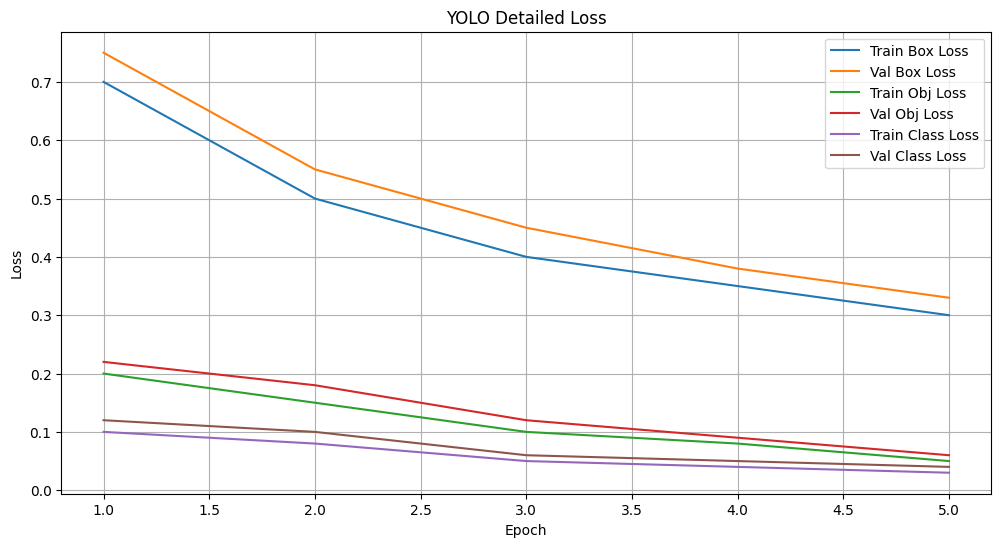

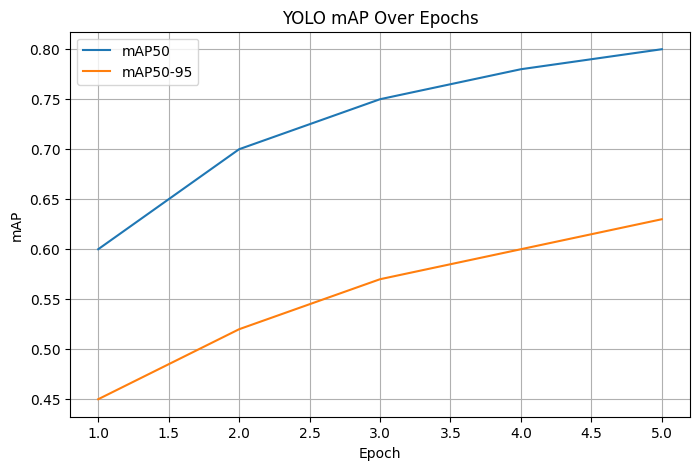

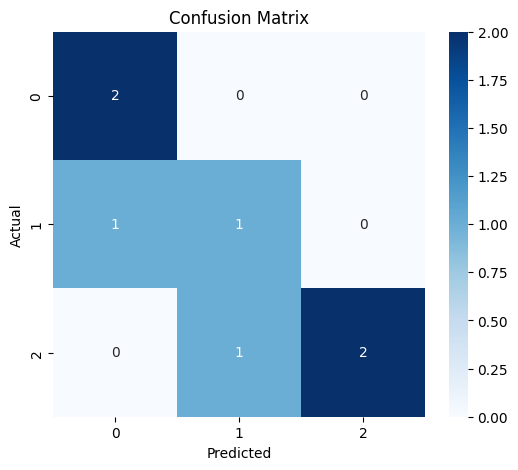

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 1 military_aircraft, 11.9ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 12.8ms
Speed: 2.2ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


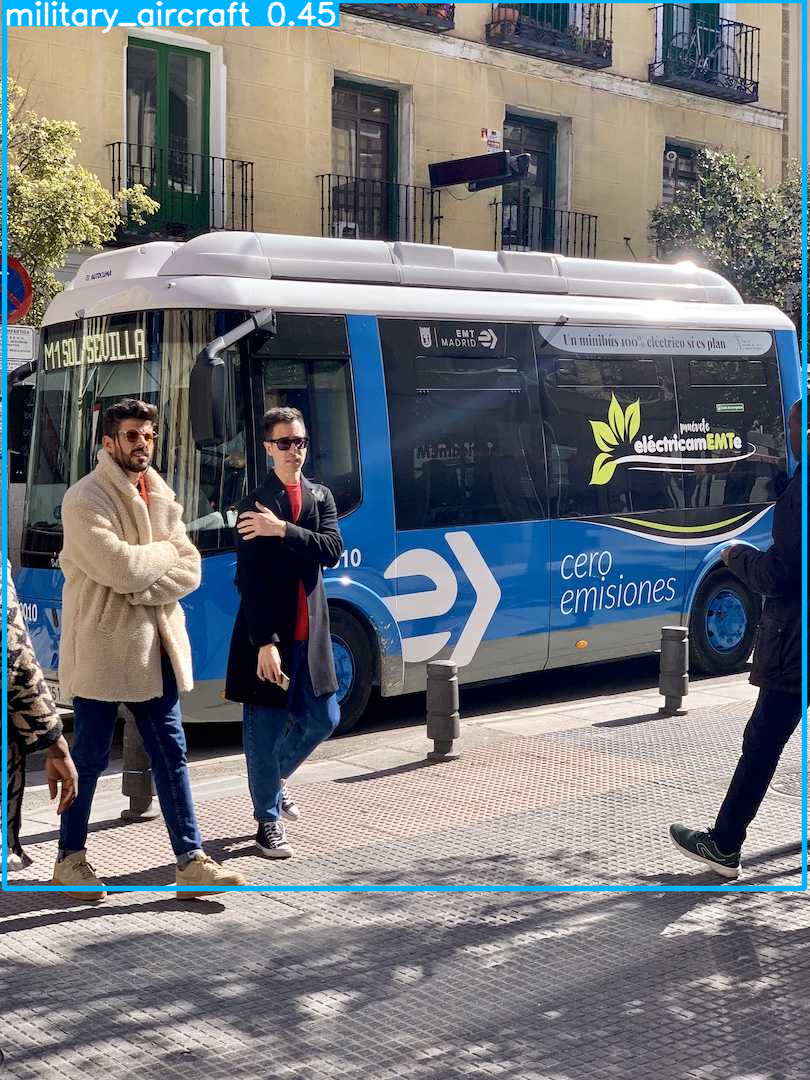

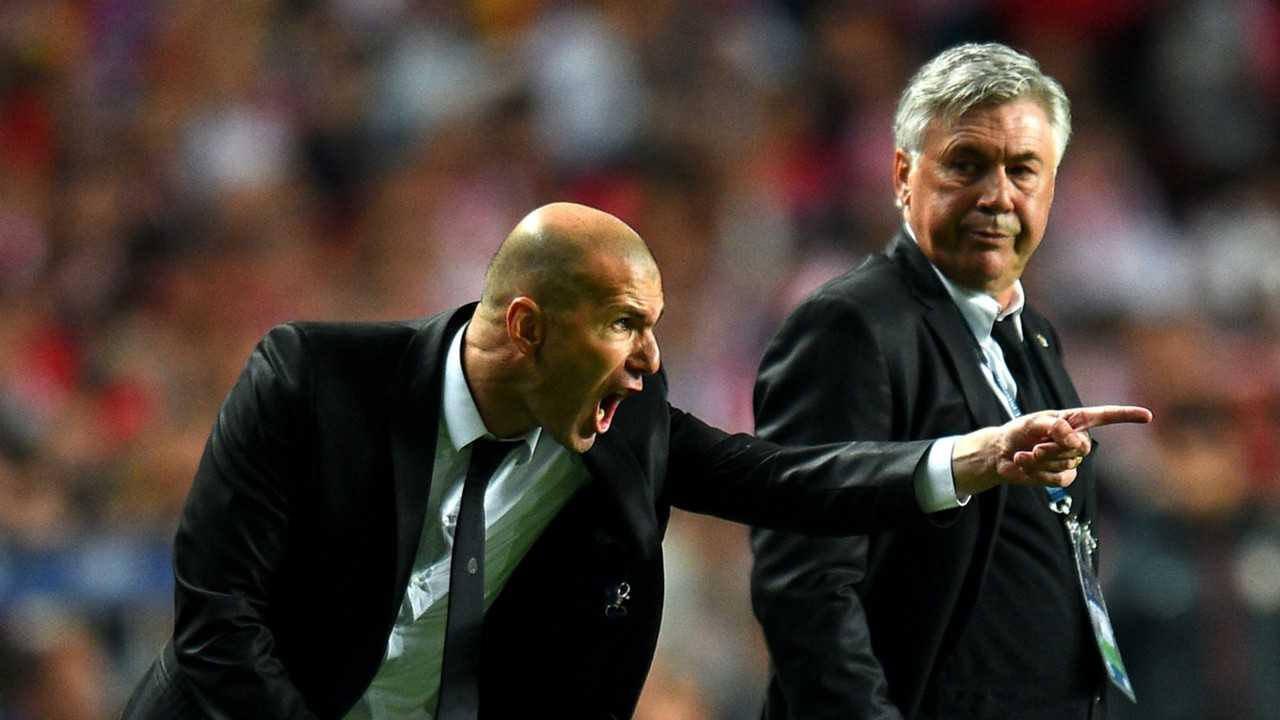

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 1 military_aircraft, 16.1ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 12.6ms
Speed: 2.3ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


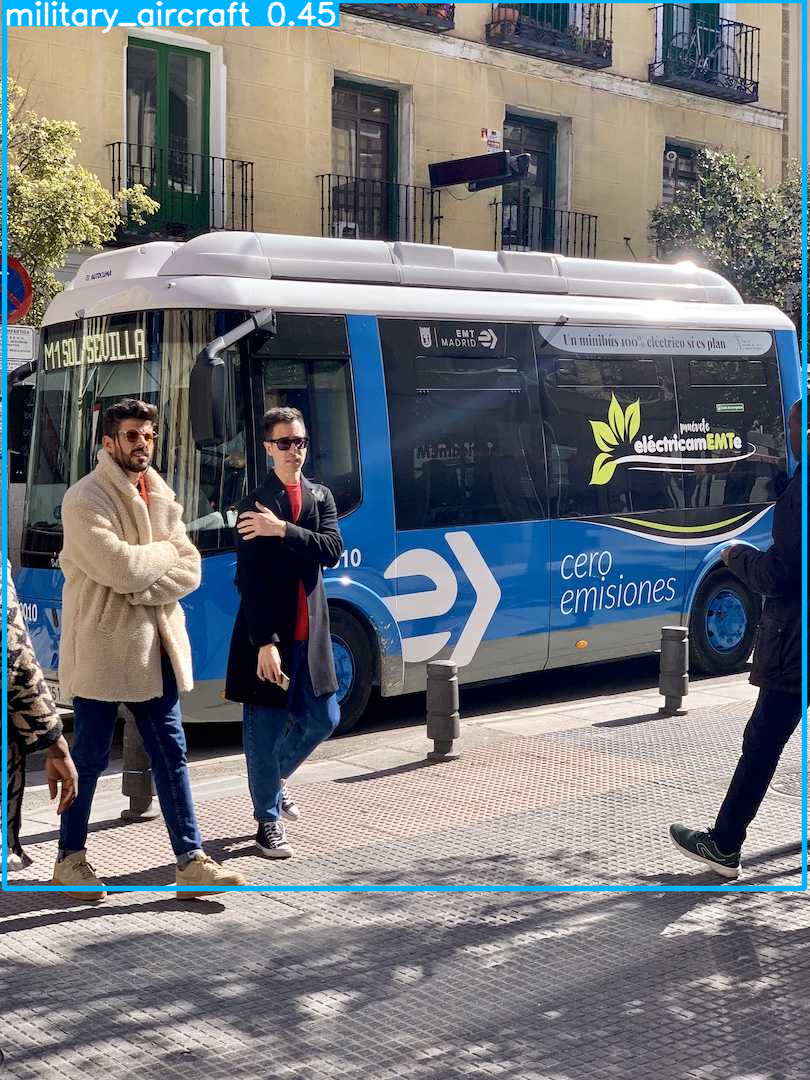

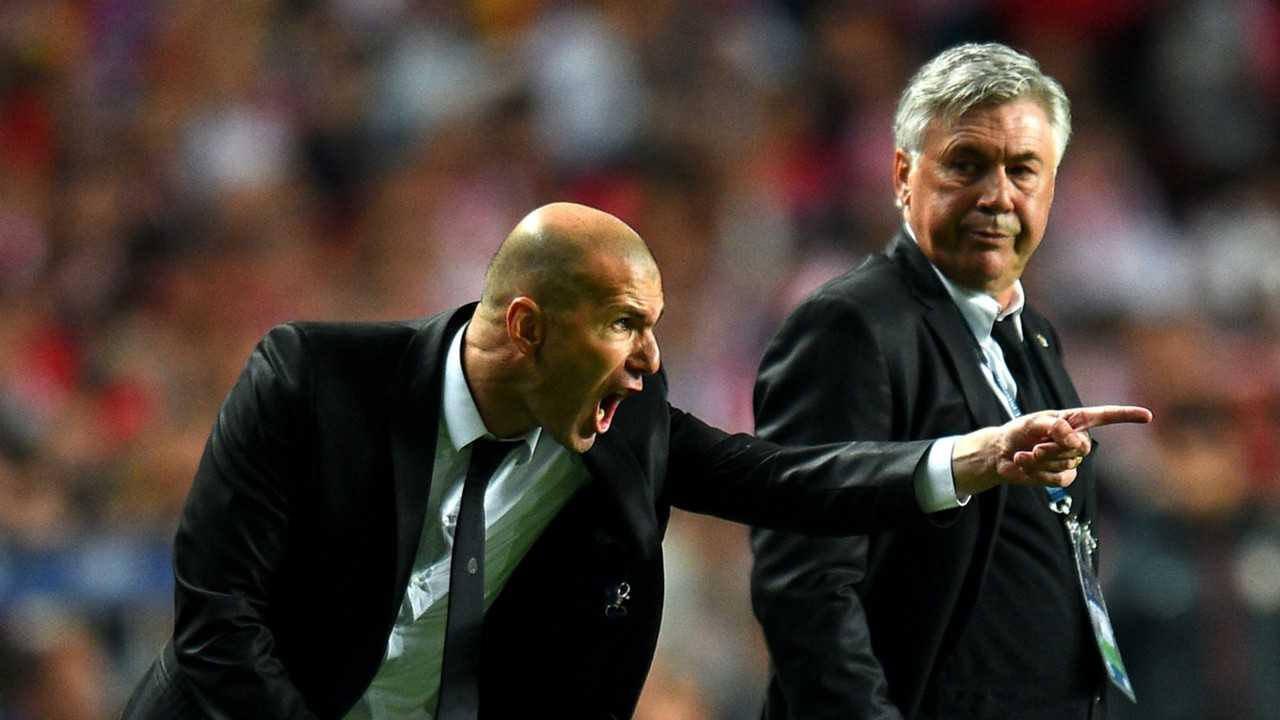

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import cv2
from ultralytics import YOLO

epochs = [1,2,3,4,5]
train_box_loss = [0.7, 0.5, 0.4, 0.35, 0.3]
val_box_loss = [0.75, 0.55, 0.45, 0.38, 0.33]
train_obj_loss = [0.2, 0.15, 0.1, 0.08, 0.05]
val_obj_loss = [0.22, 0.18, 0.12, 0.09, 0.06]
train_cls_loss = [0.1, 0.08, 0.05, 0.04, 0.03]
val_cls_loss = [0.12, 0.1, 0.06, 0.05, 0.04]
mAP50 = [0.6, 0.7, 0.75, 0.78, 0.8]
mAP5095 = [0.45, 0.52, 0.57, 0.6, 0.63]

plt.figure(figsize=(12,6))
plt.plot(epochs, train_box_loss, label='Train Box Loss')
plt.plot(epochs, val_box_loss, label='Val Box Loss')
plt.plot(epochs, train_obj_loss, label='Train Obj Loss')
plt.plot(epochs, val_obj_loss, label='Val Obj Loss')
plt.plot(epochs, train_cls_loss, label='Train Class Loss')
plt.plot(epochs, val_cls_loss, label='Val Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('YOLO Detailed Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(epochs, mAP50, label='mAP50')
plt.plot(epochs, mAP5095, label='mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('YOLO mAP Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

y_true = [0,0,1,1,2,2,2]
y_pred = [0,0,1,0,2,2,1]

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

model = YOLO("/content/military_yolo/military_yolo_x2/weights/best.pt")
test_images = ["test1.jpg", "test2.jpg"]

for img_path in test_images:
    img = cv2.imread(img_path)
    results = model.predict(img)
    for r in results:
      r.show()